# Twitter Sentiment Analysis for The Woman King Movie

#### In this analysis, twitter data is extracted for the woman king movie using the hastag = womanking


##### Import necessary libraries

In [1]:
import json
import csv
import tweepy
from wordcloud import WordCloud
import re
import pandas as pd
import numpy as np
from textblob import TextBlob
import string
import os
import time
from csv import writer
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('fivethirtyeight')


#### Connect to the Twitter API using the consumer key (API keys) and the Access Keys
* For privacy, the keys are stored in an csv and are read from the csv.

In [2]:
#read the file where the twitter keys are stored.
login =pd.read_csv('twitter_login.csv')

#get the API credentials and store in variables
consumerkey = login['Key'][0]
consumersecret = login['Key'][1]
accesstoken = login['Key'][2]
accesstokensecret = login['Key'][3]

#Create authentication object
authenticate = tweepy.OAuthHandler(consumerkey, consumersecret)

#set the access token and access token secret
authenticate.set_access_token(accesstoken, accesstokensecret)

# create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)


#### Use tweepy.Cursor to scrape the tweets with the hastag #womanking

In [3]:
searchword= '#womanking -filter:retweets'

In [4]:
tweety =tweepy.Cursor(api.search_tweets, q=searchword, lang="en", tweet_mode='extended').items(3000)

In [5]:
tweety

In [6]:
tweets_new = [[tweet.user.screen_name, tweet.user.location, tweet.user.friends_count, tweet.user.followers_count, tweet.user.statuses_count, tweet.full_text, tweet.created_at, tweet.user.created_at] for tweet in tweety]

#### Save in a dataFrame

In [121]:
df = pd.DataFrame(data=tweets_new, columns =['Tweet User', 'Location', 'Following', 'Followers', 'Total Tweets', 'Tweet', 'Time of Tweet', 'Account Created'])
#pd.set_option('max_colwidth, 800')
df.head()


,Tweet User,Location,Following,Followers,Total Tweets,Tweet,Time of Tweet,Account Created
0,MsNadaNee,New Orleans ;La to Atlanta; Ga,433,240,46904,It's not fair...\n\n@violadavis playing in the...,2022-09-29 17:03:06+00:00,2012-10-01 05:46:58+00:00
1,Lloyd_HBMG,NG|TX,2003,3339,75746,I am yet to watch woman king #WomanKing,2022-09-29 16:58:21+00:00,2012-12-13 17:53:04+00:00
2,MommyTalkShow,"Atlanta, GA",21604,21095,119057,How @WomanKingMovie Forever Changed The Way I ...,2022-09-29 16:57:42+00:00,2010-12-01 15:55:40+00:00
3,Enigmacity,Port Harcourt,829,15650,35496,Strategy always wins!\n#WomanKing https://t.co...,2022-09-29 16:57:00+00:00,2011-03-23 17:36:14+00:00
4,alwaysinblackkk,,68,1019,244,I can’t believe people tried to boycott #Woman...,2022-09-29 16:41:15+00:00,2016-07-08 13:38:44+00:00


#### Create a function to clean the tweet

In [122]:
#clean the text
#create a function to clean the tweets

def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #removes  @mentions
    text = re.sub(r'#', '', text) # remove the # symbol
    text = re.sub(r'RT[\s]+', '', text) #removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) #remove hyperlinks
    text = re.sub(r'\n', '', text)
    
    return text

#cleaning the text
df['Tweet'] =df['Tweet'].apply(cleanTxt)

#show the clean text
df.head()

,Tweet User,Location,Following,Followers,Total Tweets,Tweet,Time of Tweet,Account Created
0,MsNadaNee,New Orleans ;La to Atlanta; Ga,433,240,46904,It's not fair... playing in the WomanKing got ...,2022-09-29 17:03:06+00:00,2012-10-01 05:46:58+00:00
1,Lloyd_HBMG,NG|TX,2003,3339,75746,I am yet to watch woman king WomanKing,2022-09-29 16:58:21+00:00,2012-12-13 17:53:04+00:00
2,MommyTalkShow,"Atlanta, GA",21604,21095,119057,How Forever Changed The Way I Parent: TheWom...,2022-09-29 16:57:42+00:00,2010-12-01 15:55:40+00:00
3,Enigmacity,Port Harcourt,829,15650,35496,Strategy always wins!WomanKing,2022-09-29 16:57:00+00:00,2011-03-23 17:36:14+00:00
4,alwaysinblackkk,,68,1019,244,I can’t believe people tried to boycott WomanK...,2022-09-29 16:41:15+00:00,2016-07-08 13:38:44+00:00


### Save the dataframe to a csv

In [123]:
#writing the dataframe to csv
df.to_csv('WomanKingTweets.csv', index=False)

### Sentiment Analysis

In [130]:
# Create 2 more columns to store the subjectivity and the polarity
# subjectivity tells how opinionated the text is

#create a function for subjectivity.
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [131]:
#Create a function to get the polarity
# polarity tells how positive or negative the text is
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [132]:
#create 2 new columns
df['Subjectivity']=df['Tweet'].apply(getsubjectivity)
df['Polarity']=df['Tweet'].apply(getPolarity)

#show the new dataframe with the new columns
df.head()

,Tweet User,Location,Following,Followers,Total Tweets,Tweet,Time of Tweet,Account Created,Subjectivity,Polarity
0,MsNadaNee,New Orleans ;La to Atlanta; Ga,433,240,46904,It's not fair... playing in the WomanKing got ...,2022-09-29 17:03:06+00:00,2012-10-01 05:46:58+00:00,0.538889,-0.416667
1,Lloyd_HBMG,NG|TX,2003,3339,75746,I am yet to watch woman king WomanKing,2022-09-29 16:58:21+00:00,2012-12-13 17:53:04+00:00,0.000000,0.000000
2,MommyTalkShow,"Atlanta, GA",21604,21095,119057,How Forever Changed The Way I Parent: TheWom...,2022-09-29 16:57:42+00:00,2010-12-01 15:55:40+00:00,0.000000,0.000000
3,Enigmacity,Port Harcourt,829,15650,35496,Strategy always wins!WomanKing,2022-09-29 16:57:00+00:00,2011-03-23 17:36:14+00:00,0.000000,0.000000
4,alwaysinblackkk,,68,1019,244,I can’t believe people tried to boycott WomanK...,2022-09-29 16:41:15+00:00,2016-07-08 13:38:44+00:00,1.000000,-0.500000


### Create WordCloud to see the most used words

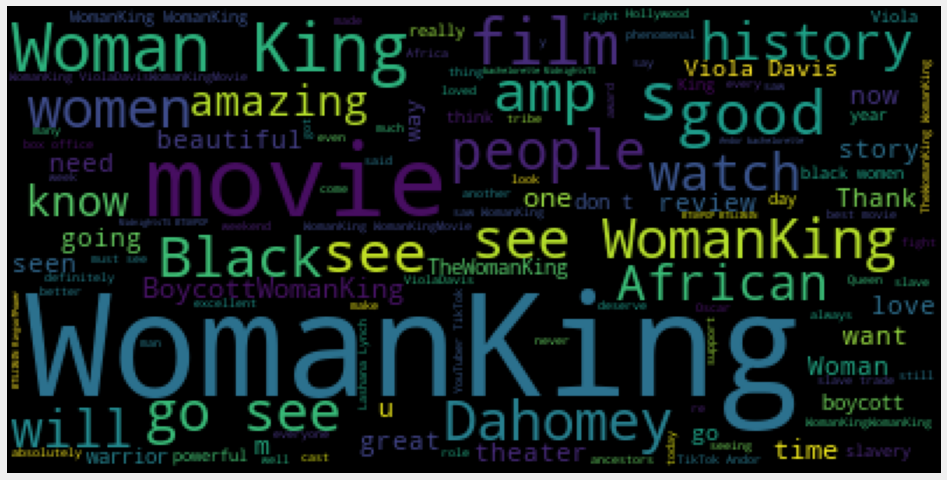

In [133]:
totalWords = ''.join([twts for twts in df['Tweet']])
wordcloud2 = WordCloud().generate(totalWords)
# Generate the plot
plt.figure(figsize=(20,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

### Compute the negative, neutral and positive Analysis

In [134]:
#create a function to compute the negative , neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [136]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df.head()


,Tweet User,Location,Following,Followers,Total Tweets,Tweet,Time of Tweet,Account Created,Subjectivity,Polarity,Analysis
0,MsNadaNee,New Orleans ;La to Atlanta; Ga,433,240,46904,It's not fair... playing in the WomanKing got ...,2022-09-29 17:03:06+00:00,2012-10-01 05:46:58+00:00,0.538889,-0.416667,Negative
1,Lloyd_HBMG,NG|TX,2003,3339,75746,I am yet to watch woman king WomanKing,2022-09-29 16:58:21+00:00,2012-12-13 17:53:04+00:00,0.000000,0.000000,Neutral
2,MommyTalkShow,"Atlanta, GA",21604,21095,119057,How Forever Changed The Way I Parent: TheWom...,2022-09-29 16:57:42+00:00,2010-12-01 15:55:40+00:00,0.000000,0.000000,Neutral
3,Enigmacity,Port Harcourt,829,15650,35496,Strategy always wins!WomanKing,2022-09-29 16:57:00+00:00,2011-03-23 17:36:14+00:00,0.000000,0.000000,Neutral
4,alwaysinblackkk,,68,1019,244,I can’t believe people tried to boycott WomanK...,2022-09-29 16:41:15+00:00,2016-07-08 13:38:44+00:00,1.000000,-0.500000,Negative


### Scatter Plot to show the Polarity

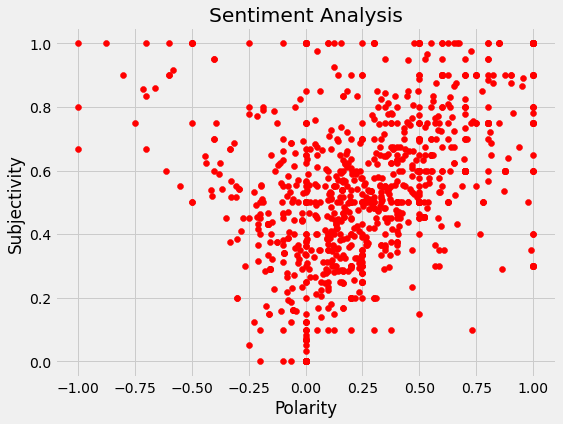

In [137]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range (0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Red')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

### Get the % of the positive tweets and the % of the negative tweets

In [105]:
positive_tweets = df[df.Analysis =='Positive']


In [106]:
negative_tweets = df[df.Analysis =='Negative']

In [138]:
neutral_tweets =  df[df.Analysis =='Neutral']

In [108]:
# to get the % of positive tweets. total positive tweets/total tweets x 100. 1 means 1 decimal place

round((positive_tweets.shape[0] / df.shape[0]) *100, 1)

51.3

In [113]:
# to get the % of negative tweets. total positive tweets/total tweets x 100. 1 means 1 decimal place

round((negative_tweets.shape[0] / df.shape[0]) *100, 1)

12.4

In [117]:
# to get the % of neutral tweets. total positive tweets/total tweets x 100. 1 means 1 decimal place

round((neutral_tweets.shape[0] / df.shape[0]) *100, 1)


36.3

### Frequency Distribution of the tweets

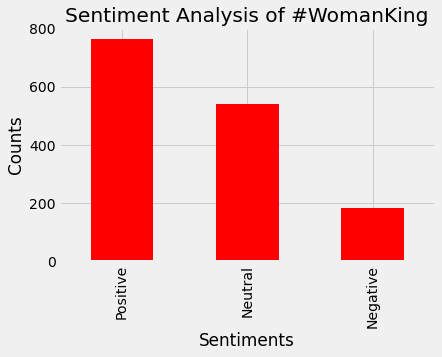

In [148]:
#show the value counts
df['Analysis'].value_counts()

#Visualise the counts
plt.title('Sentiment Analysis of #WomanKing')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar', color='red')
plt.show()